### **Feature Engineering**


### **Cài đặt thư viện**


In [937]:
from IPython.core.interactiveshell import InteractiveShell
from pprint import pprint
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings("ignore")
InteractiveShell.ast_node_interactivity = "all"

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2023-05-21 12:48:34 +07:00)


In [938]:
df_watch = pd.read_csv("../main/clean_data/clean_data.csv")

df_watch = df_watch.drop(df_watch.columns[0], axis=1)

df_watch.head()


,Mã sản phẩm,Thương hiệu,Giá tiền (VNĐ),Chất liệu dây,Chất liệu vỏ,Xuất xứ,Giới tính,Chất liệu mặt kính,Độ chịu nước (ATM),Bảo hành,Kiểu máy,Kích cỡ (mm)
0,PA5018H,Philippe Auguste,4581000,Dây da,Thép không gỉ,Trung Quốc,Nam,Kính sapphire,5.0,2.0,Quartz,42.0
1,PA5018G,Philippe Auguste,4581000,Dây da,Thép không gỉ,Trung Quốc,Nam,Kính sapphire,5.0,2.0,Quartz,42.0
2,PA2022,Philippe Auguste,10710000,Dây da,Thép không gỉ,Trung Quốc,Nam,Kính sapphire,5.0,2.0,Quartz,40.0
3,PA5021B,Philippe Auguste,5379300,Dây da,Thép không gỉ,Trung Quốc,Nam,Kính sapphire,10.0,2.0,Quartz,42.0
4,PA5021H,Philippe Auguste,5990400,Dây da,Thép không gỉ,Trung Quốc,Nam,Kính sapphire,10.0,2.0,Quartz,42.0


time: 79 ms (started: 2023-05-21 12:48:34 +07:00)


In [939]:
df_watch.tail

<bound method NDFrame.tail of        Mã sản phẩm          Thương hiệu  Giá tiền (VNĐ)  Chất liệu dây   Chất liệu vỏ     Xuất xứ Giới tính Chất liệu mặt kính  Độ chịu nước (ATM)  Bảo hành Kiểu máy  Kích cỡ (mm)
0          PA5018H     Philippe Auguste         4581000         Dây da  Thép không gỉ  Trung Quốc       Nam      Kính sapphire                 5.0       2.0   Quartz          42.0
1          PA5018G     Philippe Auguste         4581000         Dây da  Thép không gỉ  Trung Quốc       Nam      Kính sapphire                 5.0       2.0   Quartz          42.0
2           PA2022     Philippe Auguste        10710000         Dây da  Thép không gỉ  Trung Quốc       Nam      Kính sapphire                 5.0       2.0   Quartz          40.0
3          PA5021B     Philippe Auguste         5379300         Dây da  Thép không gỉ  Trung Quốc       Nam      Kính sapphire                10.0       2.0   Quartz          42.0
4          PA5021H     Philippe Auguste         5990400         Dây da

time: 15 ms (started: 2023-05-21 12:48:34 +07:00)


In [940]:
df_watch.shape

(13851, 12)

time: 0 ns (started: 2023-05-21 12:48:34 +07:00)


In [941]:
df_watch.dtypes

Mã sản phẩm            object
Thương hiệu            object
Giá tiền (VNĐ)          int64
Chất liệu dây          object
Chất liệu vỏ           object
Xuất xứ                object
Giới tính              object
Chất liệu mặt kính     object
Độ chịu nước (ATM)    float64
Bảo hành              float64
Kiểu máy               object
Kích cỡ (mm)          float64
dtype: object

time: 0 ns (started: 2023-05-21 12:48:34 +07:00)


In [942]:
df_watch.isna().sum()

Mã sản phẩm            27
Thương hiệu           327
Giá tiền (VNĐ)          0
Chất liệu dây         393
Chất liệu vỏ          503
Xuất xứ               257
Giới tính              72
Chất liệu mặt kính     48
Độ chịu nước (ATM)    165
Bảo hành              123
Kiểu máy               28
Kích cỡ (mm)          245
dtype: int64

time: 31 ms (started: 2023-05-21 12:48:35 +07:00)


- Các cột null ở mức độ tương đối


In [943]:
# Xóa các hàng có mã sản phẩm null

df_watch = df_watch[df_watch["Mã sản phẩm"].isnull() == False]

df_watch["Giá tiền (VNĐ)"] = df_watch["Giá tiền (VNĐ)"].astype(float)

time: 16 ms (started: 2023-05-21 12:48:35 +07:00)


### **Xem thông tin từng cột**


Thương hiệu
['Philippe Auguste' 'Diamond D' 'Atlantic Swiss' 'Aries Gold' 'Epos Swiss'
 'Jacques Lemans' 'Tourbillon Memorigin' 'Q&Q Citizen' nan 'Bruno Sohnle'
 'Citizen' 'Casio' 'Stuhrling' 'Olympia Star' 'Calvin Klein' 'Hamilton'
 'Seiko' 'Orient' 'Longines' 'Daniel Wellington' 'Tissot' 'Olym Pianus'
 'Fossil' 'Skagen' 'Freelook' 'Mido' 'Frederique Constant' 'Titoni'
 'Charriol' 'Eterna' 'Claude Bernard' 'Candino' 'Certina' 'Rotary'
 'Michael Kors' 'Maurice Lacroix' 'Lobinni' 'Carnival' 'Teintop' 'Kassaw'
 'Iw Carnival' 'Poniger' 'Hazeal' 'Lorbern' 'Leonidas' 'Mini Focus'
 'Stefano Ricci' 'Ogival' 'Festina' 'Bulova' 'Bentley' 'OP' 'Doxa' 'Saga'
 'Koi' 'Rado' 'Movado' 'Police' 'Sokolov' 'Adriatica' 'Timex']


<Figure size 3000x600 with 0 Axes>

<Figure size 3000x600 with 0 Axes>

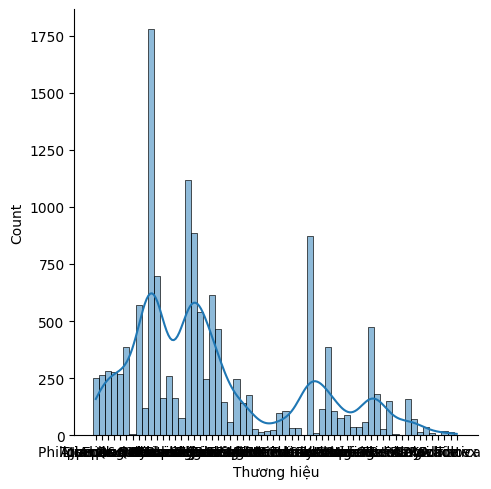

Chất liệu dây
['Dây da' 'Hợp kim Titanium' 'Thép không gỉ' 'Gốm ceramic' 'Dây cao su'
 nan 'Dây silicon' 'Dây vải' 'Dây nhựa' 'Dây kim loại' 'Dây dù' 'Dây vàng'
 'Dây đá' 'Dây nato' 'Dây satin' 'Dây mesh' 'Dây lụa']


<Figure size 3000x600 with 0 Axes>

<Figure size 3000x600 with 0 Axes>

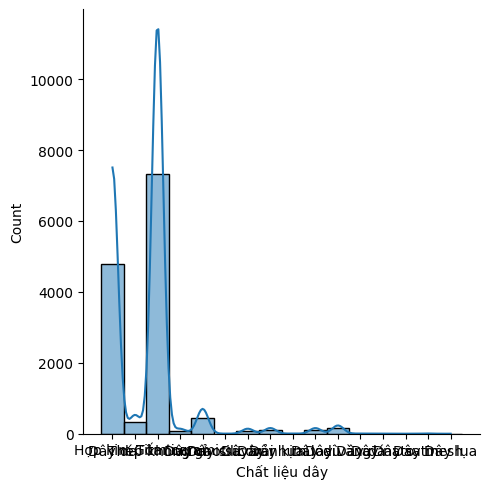

Chất liệu vỏ
['Thép không gỉ' 'Hợp kim Titanium' 'Vàng' nan 'Nhựa' 'Gốm ceramic'
 'Thủy tinh' 'Carbon' 'Bạc' 'Đồng']


<Figure size 3000x600 with 0 Axes>

<Figure size 3000x600 with 0 Axes>

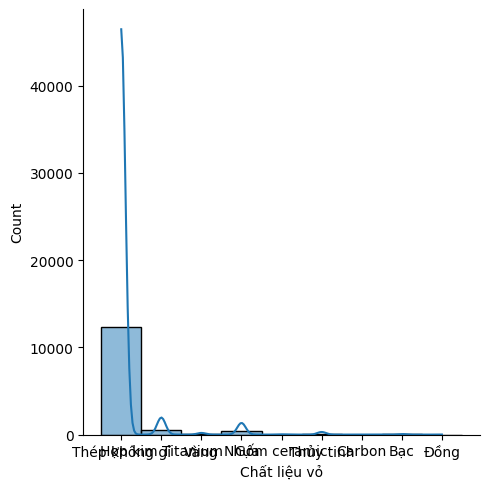

Xuất xứ
['Trung Quốc' 'Thụy Sĩ' 'Singapore' 'Áo' 'Đức' 'Nhật Bản' nan 'Thụy Điển'
 'Mỹ' 'Đan Mạch' 'Pháp' 'Tây Ban Nha' 'Việt Nam' 'Ý' 'Nga']


<Figure size 3000x600 with 0 Axes>

<Figure size 3000x600 with 0 Axes>

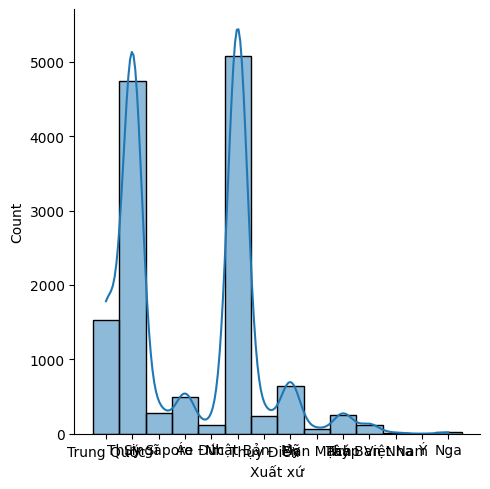

Giới tính
['Nam' 'Nữ' nan]


<Figure size 3000x600 with 0 Axes>

<Figure size 3000x600 with 0 Axes>

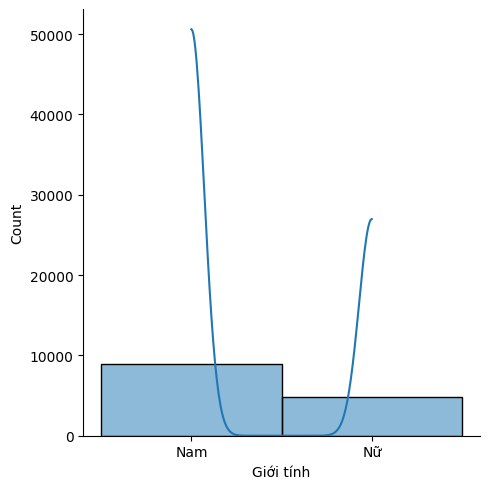

Chất liệu mặt kính
['Kính sapphire' 'Kính hardlex' 'Kính cứng' nan 'Kính nhựa'
 'Kính cường lực' 'Kính mica' 'Kính hesalite' 'Kính thường']


<Figure size 3000x600 with 0 Axes>

<Figure size 3000x600 with 0 Axes>

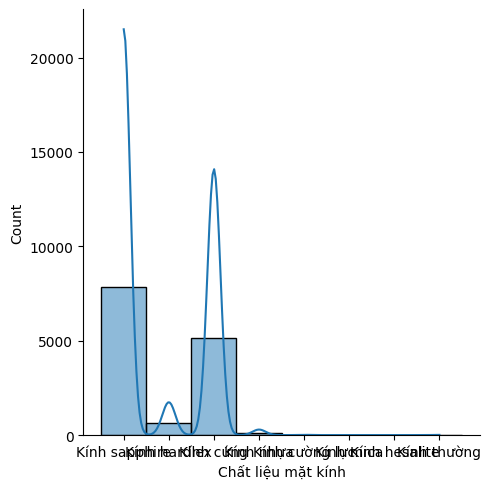

Độ chịu nước (ATM)
[ 5. 10.  3. 50. 20. nan 30.  6. 12. 60. 38.]


<Figure size 3000x600 with 0 Axes>

<Figure size 3000x600 with 0 Axes>

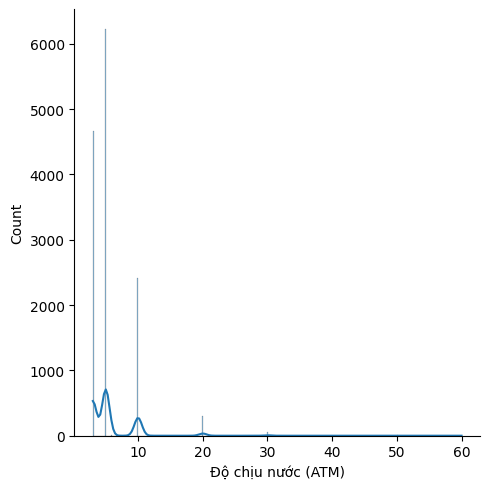

Bảo hành
[  2.  10.   1.  nan   5.   3. 100.]


<Figure size 3000x600 with 0 Axes>

<Figure size 3000x600 with 0 Axes>

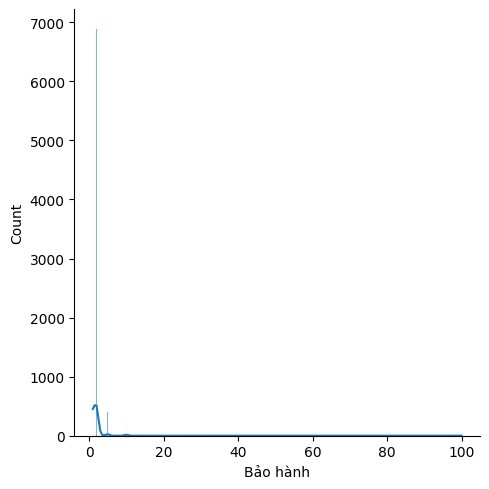

Kiểu máy
['Quartz' 'Automatic' 'Hand Winding' 'Eco-Drive' 'Pin' nan 'Kinentic'
 'Cảm ứng' 'Japan movement' 'Solar']


<Figure size 3000x600 with 0 Axes>

<Figure size 3000x600 with 0 Axes>

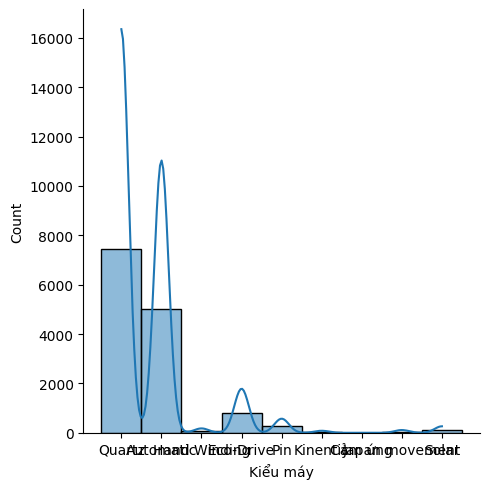

Kích cỡ (mm)
[42.   40.   32.   34.   24.   28.   27.   33.   26.   38.   30.   23.
 25.   41.7  41.   43.5  43.   36.   20.   22.   39.     nan 45.   21.
 41.3  34.8  18.   17.   44.5  28.5  44.   37.   31.5  26.5  33.5  32.5
 38.5  29.   40.8  35.   31.   41.5  52.   57.   36.5  40.5  21.4  45.5
 31.8  47.   28.2  43.6  38.8  42.5  44.7  46.8  37.2  35.8  46.   43.8
 48.4  49.5  50.6  46.9  46.6  45.6  45.4  48.5   8.9  34.7  34.9  33.2
 30.3  31.2  40.6  28.6  35.4  23.5  48.   27.5  54.   55.   50.   49.
 46.2  38.4  25.5  38.3  37.3  37.7  38.7  39.5  12.   44.8  30.7  51.
 36.6  16.   35.5  19.5  31.4  35.6  42.4  41.2  23.3  51.2  37.8  39.2
 44.1  29.7  39.7  47.1  42.2  42.3  38.75 45.9  20.8  29.5  26.3  24.4
 39.3  15.   42.8  36.9  33.1  48.7  25.3  29.3  43.3  19.8  39.4  41.4
 22.2  29.4  24.5  45.2  27.95 30.5  40.3  43.7  32.3  39.9  28.7  19.
 29.8  43.4  22.4  14.5  30.1  27.2  44.2  48.6  31.1  40.2  43.9  46.1
 24.6  41.6  31.6  34.5  29.9  23.1  37.5  48.8  46.95 4

<Figure size 3000x600 with 0 Axes>

<Figure size 3000x600 with 0 Axes>

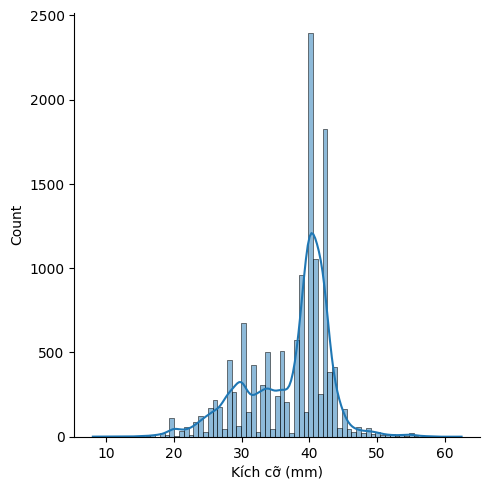

time: 7.7 s (started: 2023-05-21 12:48:35 +07:00)


In [944]:
for col in list(df_watch.drop(["Mã sản phẩm", "Giá tiền (VNĐ)"], axis=1)):
    print(col)
    print(df_watch[col].unique())
    plt.figure(figsize=(30, 6))
    sns.displot(df_watch[col], kde=True)
    plt.show();

In [945]:
df_watch.drop("Mã sản phẩm", axis=1).describe()

,Giá tiền (VNĐ),Độ chịu nước (ATM),Bảo hành,Kích cỡ (mm)
count,1.382400e+04,13673.000000,13701.000000,13595.000000
mean,1.064098e+07,5.693118,1.926648,37.204565
std,1.647904e+07,3.941612,3.429235,6.166297
min,4.150000e+05,3.000000,1.000000,8.000000
25%,3.690000e+06,3.000000,1.000000,33.000000
50%,5.512500e+06,5.000000,2.000000,40.000000
75%,9.906300e+06,5.000000,2.000000,41.500000
max,3.775860e+08,60.000000,100.000000,62.500000


time: 47 ms (started: 2023-05-21 12:48:43 +07:00)


In [946]:
df_watch["Thương hiệu"].unique()


array(['Philippe Auguste', 'Diamond D', 'Atlantic Swiss', 'Aries Gold',
       'Epos Swiss', 'Jacques Lemans', 'Tourbillon Memorigin',
       'Q&Q Citizen', nan, 'Bruno Sohnle', 'Citizen', 'Casio',
       'Stuhrling', 'Olympia Star', 'Calvin Klein', 'Hamilton', 'Seiko',
       'Orient', 'Longines', 'Daniel Wellington', 'Tissot', 'Olym Pianus',
       'Fossil', 'Skagen', 'Freelook', 'Mido', 'Frederique Constant',
       'Titoni', 'Charriol', 'Eterna', 'Claude Bernard', 'Candino',
       'Certina', 'Rotary', 'Michael Kors', 'Maurice Lacroix', 'Lobinni',
       'Carnival', 'Teintop', 'Kassaw', 'Iw Carnival', 'Poniger',
       'Hazeal', 'Lorbern', 'Leonidas', 'Mini Focus', 'Stefano Ricci',
       'Ogival', 'Festina', 'Bulova', 'Bentley', 'OP', 'Doxa', 'Saga',
       'Koi', 'Rado', 'Movado', 'Police', 'Sokolov', 'Adriatica', 'Timex'],
      dtype=object)

time: 0 ns (started: 2023-05-21 12:48:43 +07:00)


<Figure size 1000x500 with 0 Axes>

<Axes: >

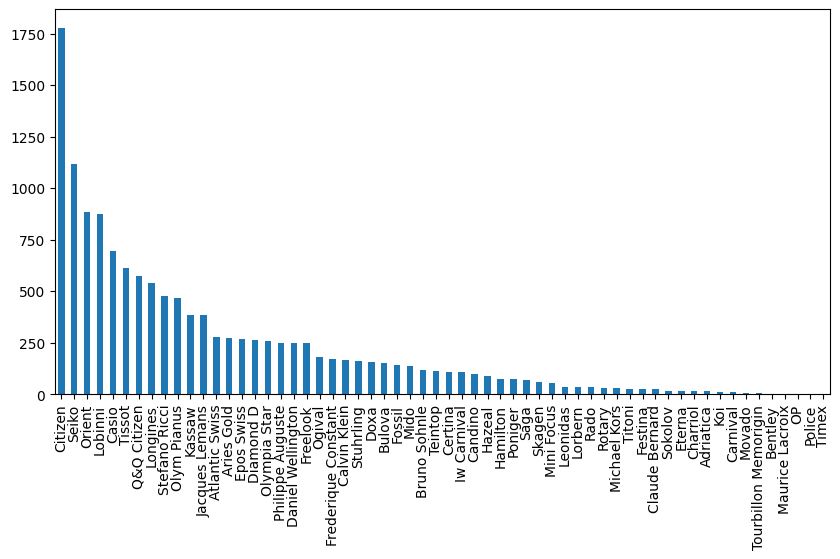

time: 688 ms (started: 2023-05-21 12:48:43 +07:00)


In [947]:
plt.figure(figsize=(10, 5))
df_watch["Thương hiệu"].value_counts().plot(kind="bar")

<Axes: >

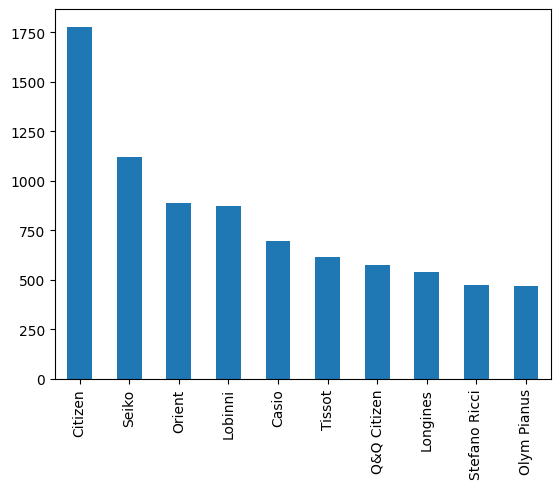

time: 203 ms (started: 2023-05-21 12:48:43 +07:00)


In [948]:
# Top 10 thương hiệu

df_watch["Thương hiệu"].value_counts()[:10].plot(kind="bar")

In [949]:
df_watch = df_watch.fillna(df_watch.iloc[0])


time: 31 ms (started: 2023-05-21 12:48:44 +07:00)


In [950]:
df_watch.isnull().sum()


Mã sản phẩm           0
Thương hiệu           0
Giá tiền (VNĐ)        0
Chất liệu dây         0
Chất liệu vỏ          0
Xuất xứ               0
Giới tính             0
Chất liệu mặt kính    0
Độ chịu nước (ATM)    0
Bảo hành              0
Kiểu máy              0
Kích cỡ (mm)          0
dtype: int64

time: 31 ms (started: 2023-05-21 12:48:44 +07:00)


In [951]:
df_watch.to_csv("a.csv")

time: 94 ms (started: 2023-05-21 12:48:44 +07:00)


In [952]:
df_watch["Thương hiệu"].unique()

array(['Philippe Auguste', 'Diamond D', 'Atlantic Swiss', 'Aries Gold',
       'Epos Swiss', 'Jacques Lemans', 'Tourbillon Memorigin',
       'Q&Q Citizen', 'Bruno Sohnle', 'Citizen', 'Casio', 'Stuhrling',
       'Olympia Star', 'Calvin Klein', 'Hamilton', 'Seiko', 'Orient',
       'Longines', 'Daniel Wellington', 'Tissot', 'Olym Pianus', 'Fossil',
       'Skagen', 'Freelook', 'Mido', 'Frederique Constant', 'Titoni',
       'Charriol', 'Eterna', 'Claude Bernard', 'Candino', 'Certina',
       'Rotary', 'Michael Kors', 'Maurice Lacroix', 'Lobinni', 'Carnival',
       'Teintop', 'Kassaw', 'Iw Carnival', 'Poniger', 'Hazeal', 'Lorbern',
       'Leonidas', 'Mini Focus', 'Stefano Ricci', 'Ogival', 'Festina',
       'Bulova', 'Bentley', 'OP', 'Doxa', 'Saga', 'Koi', 'Rado', 'Movado',
       'Police', 'Sokolov', 'Adriatica', 'Timex'], dtype=object)

time: 0 ns (started: 2023-05-21 12:48:44 +07:00)


In [953]:
from sklearn.preprocessing import LabelEncoder

name_cols_numeric = [
    "Mã sản phẩm",
    "Giá tiền (VNĐ)",
    "Độ chịu nước (ATM)",
    "Kích cỡ (mm)",
]

name_cols = list(df_watch.columns)

for val in name_cols:
    if val in name_cols_numeric:
        name_cols.remove(val)

name_cols_cate = name_cols

name_cols_cate

['Thương hiệu',
 'Chất liệu dây',
 'Chất liệu vỏ',
 'Xuất xứ',
 'Giới tính',
 'Chất liệu mặt kính',
 'Bảo hành',
 'Kiểu máy']

time: 16 ms (started: 2023-05-21 12:48:44 +07:00)


In [954]:
from sklearn.preprocessing import LabelEncoder


def label_encoder(df, lst_col):
    for val in lst_col:
        le = LabelEncoder()
        df[val] = le.fit_transform(df[val])

    return df


df_watch = label_encoder(df_watch, name_cols_cate)

df_watch.head()

,Mã sản phẩm,Thương hiệu,Giá tiền (VNĐ),Chất liệu dây,Chất liệu vỏ,Xuất xứ,Giới tính,Chất liệu mặt kính,Độ chịu nước (ATM),Bảo hành,Kiểu máy,Kích cỡ (mm)
0,PA5018H,43,4581000.0,1,5,7,0,6,5.0,1,7,42.0
1,PA5018G,43,4581000.0,1,5,7,0,6,5.0,1,7,42.0
2,PA2022,43,10710000.0,1,5,7,0,6,5.0,1,7,40.0
3,PA5021B,43,5379300.0,1,5,7,0,6,10.0,1,7,42.0
4,PA5021H,43,5990400.0,1,5,7,0,6,10.0,1,7,42.0


time: 31 ms (started: 2023-05-21 12:48:44 +07:00)


In [955]:
df_watch["Thương hiệu"].unique()


array([43, 15,  2,  1, 17, 26, 59, 46,  4, 12,  9, 54, 41,  6, 23, 50, 42,
       31, 14, 57, 40, 20, 51, 22, 35, 21, 58, 11, 18, 13,  7, 10, 48, 34,
       33, 30,  8, 55, 27, 25, 45, 24, 32, 29, 36, 53, 39, 19,  5,  3, 38,
       16, 49, 28, 47, 37, 44, 52,  0, 56])

time: 0 ns (started: 2023-05-21 12:48:44 +07:00)


<Figure size 2000x1600 with 0 Axes>

<Axes: >

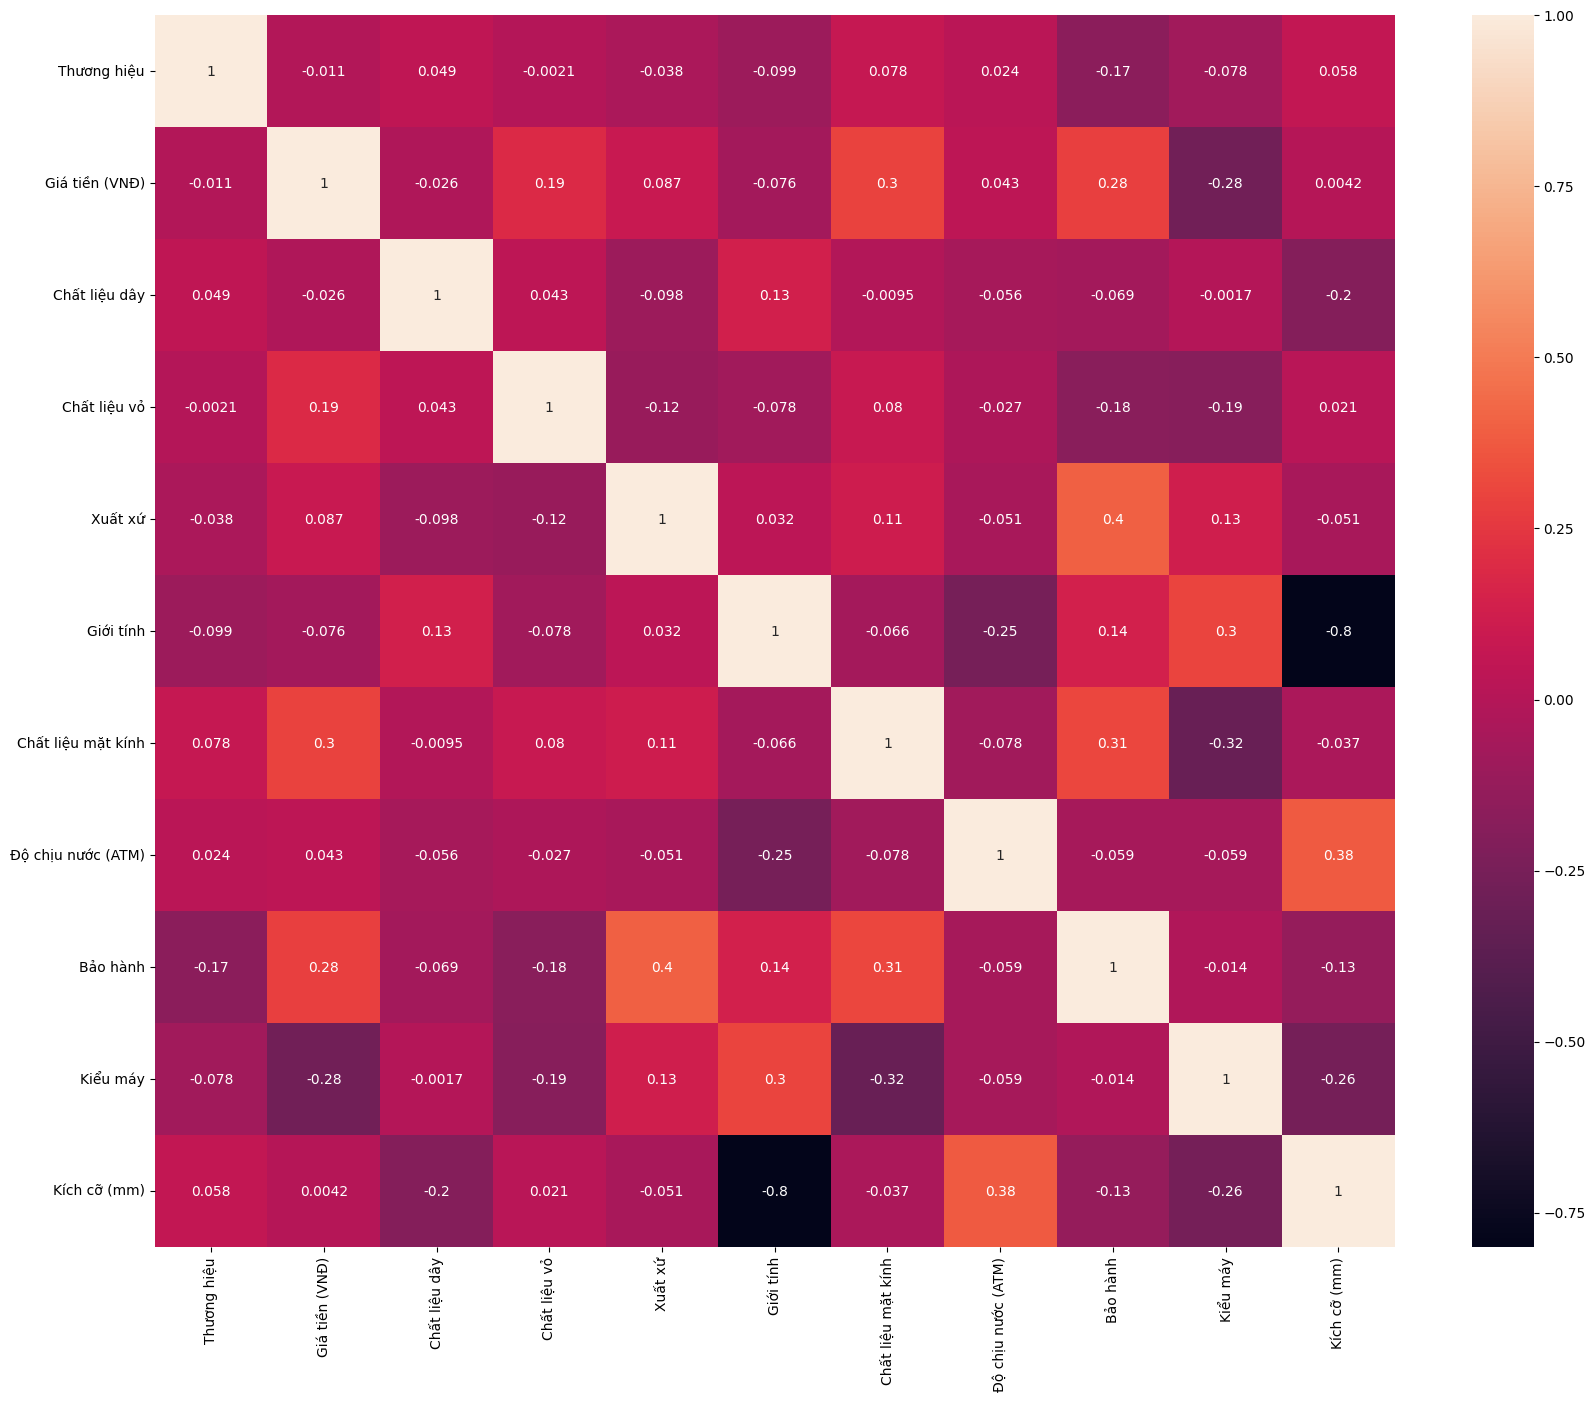

time: 843 ms (started: 2023-05-21 12:48:44 +07:00)


In [956]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_watch.corr(), fmt=".2g", annot=True)


In [957]:
from sklearn.model_selection import train_test_split

X = df_watch.drop(["Giá tiền (VNĐ)", "Mã sản phẩm"], axis=1)

# X = df_watch[['Thương hiệu', 'Chất liệu vỏ', 'Bảo hành', 'Chất liệu mặt kính', 'Xuất xứ']]
y = df_watch["Giá tiền (VNĐ)"]

time: 15 ms (started: 2023-05-21 12:48:45 +07:00)


In [958]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

time: 15 ms (started: 2023-05-21 12:48:45 +07:00)


In [959]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


rf = RandomForestRegressor()

rf.fit(X_train, y_train)

RandomForestRegressor()

time: 2.28 s (started: 2023-05-21 12:48:45 +07:00)


In [960]:
from sklearn import metrics

y_pred = rf.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)

mae

2236805.8770575537

time: 93 ms (started: 2023-05-21 12:48:48 +07:00)


Tree Decision


In [961]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeRegressor()

param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(dtree, param_grid, cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

bst_params = grid_search.best_params_

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='neg_mean_squared_error')

time: 11.5 s (started: 2023-05-21 12:48:48 +07:00)


In [962]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(random_state=0, max_depth=bst_params['max_depth'], max_features=bst_params['max_features'],
                              min_samples_leaf=bst_params['min_samples_leaf'], min_samples_split=bst_params['min_samples_split'])

dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features='auto', random_state=0)

time: 32 ms (started: 2023-05-21 12:48:59 +07:00)


In [963]:
from sklearn import metrics

y_pred = dtree.predict(X_test)

mae = metrics.mean_squared_error(y_pred, y_test)

print(mae)


67306634798436.03
time: 15 ms (started: 2023-05-21 12:49:00 +07:00)


<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='Importance', ylabel='Feature Name'>

Text(0.5, 1.0, 'Feature Importance Each Attributes (Decision Tree Regressor)')

Text(0.5, 0, 'Importance')

Text(0, 0.5, 'Feature Name')

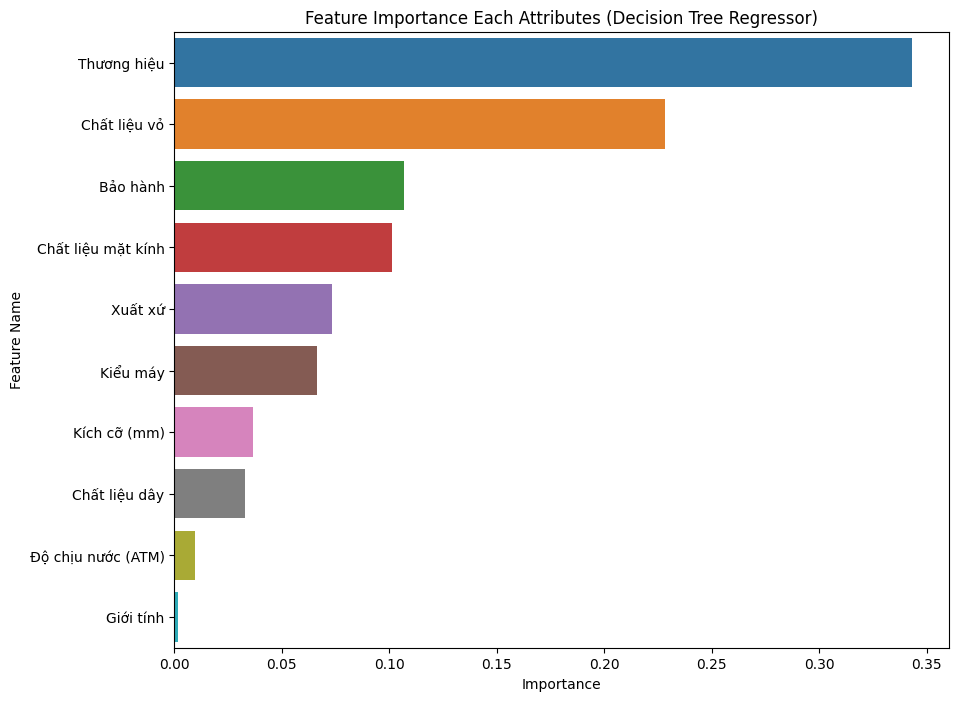

time: 328 ms (started: 2023-05-21 12:49:00 +07:00)


In [964]:
imp_df = pd.DataFrame({
    'Feature Name': X_train.columns,
    'Importance': dtree.feature_importances_
})

fi = imp_df.sort_values(by='Importance', ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10, 8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)')

plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

In [965]:
len(df_watch[df_watch["Giới tính"] == 0])

9036

time: 16 ms (started: 2023-05-21 12:49:00 +07:00)


In [966]:
len(df_watch[df_watch["Giới tính"] == 1])

4788

time: 0 ns (started: 2023-05-21 12:49:00 +07:00)


In [967]:
top_5_features = list(fi.head(5)["Feature Name"])

top_5_features

# X = df_watch[top_5_features]
# y = df_watch["Giá tiền (VNĐ)"]

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=0)


# dtree = DecisionTreeRegressor()

# param_grid = {
#     'max_depth': [2, 4, 6, 8],
#     'min_samples_split':[2, 4, 6, 8],
#     'min_samples_leaf':[1, 2, 3, 4],
#     'max_features' :['auto', 'sqrt', 'log2']
# }

# grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# grid_search.fit(X_train, y_train)

# bst_params = grid_search.best_params_

# y_pred = dtree.predict(X_test)

# mae = metrics.mean_squared_error(y_pred, y_test)

# print(mae)

['Thương hiệu', 'Chất liệu vỏ', 'Bảo hành', 'Chất liệu mặt kính', 'Xuất xứ']

time: 0 ns (started: 2023-05-21 12:49:00 +07:00)
